In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Import of our Data
df = pd.read_csv('BTC-USD.csv')

In [5]:
df.shape

(3264, 7)

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3.264000e+03
mean,13831.316451,14162.997410,13467.318882,13837.918382,13837.918382,1.652734e+10
std,16007.913701,16402.745226,15556.469557,16004.565842,16004.565842,1.939374e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,774.412506,780.534012,767.607254,776.980270,776.980270,1.343655e+08
50%,7876.488769,8087.814454,7646.816162,7883.377930,7883.377930,1.058442e+10
75%,20937.836914,21462.410644,20543.024414,20989.047851,20989.047851,2.725881e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [8]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

<Axes: >

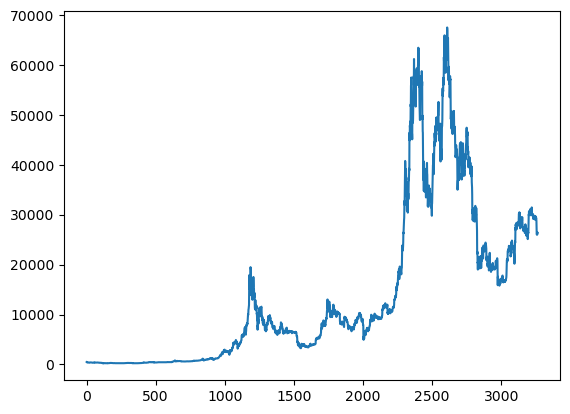

In [10]:
df['Close'].plot()

In [11]:
df.set_index('Date', inplace= True)

In [12]:
df.index

Index(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20', '2014-09-21',
       '2014-09-22', '2014-09-23', '2014-09-24', '2014-09-25', '2014-09-26',
       ...
       '2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18', '2023-08-19',
       '2023-08-20', '2023-08-21', '2023-08-22', '2023-08-23', '2023-08-24'],
      dtype='object', name='Date', length=3264)

In [13]:
# Transformation of our index to time series index
df.index = pd.to_datetime(df.index)

In [14]:
df.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18',
               '2023-08-19', '2023-08-20', '2023-08-21', '2023-08-22',
               '2023-08-23', '2023-08-24'],
              dtype='datetime64[ns]', name='Date', length=3264, freq=None)

<Axes: xlabel='Date'>

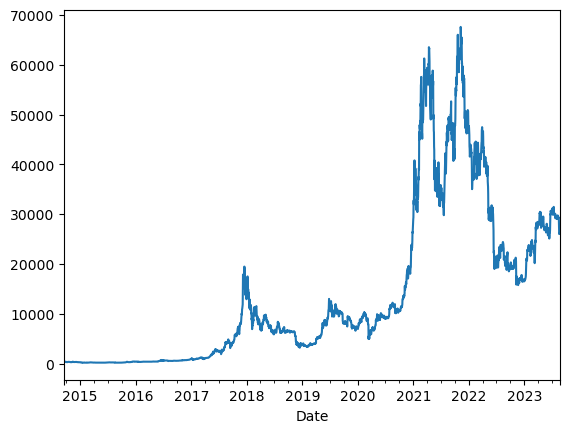

In [15]:
df['Close'].plot()

<Axes: xlabel='Date'>

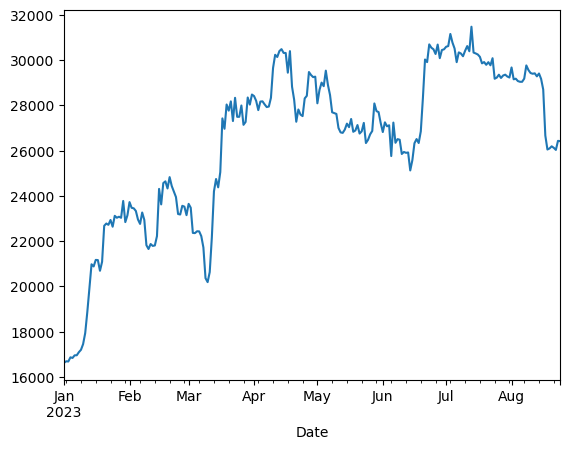

In [16]:
# Visualisation of the BTC close of 2023
df.loc['2023','Close'].plot()

# Resample using :
Resample allow us to group our data by frequency and apply on them some operations like mean() , std() , max() ...
    Y : year , M: month ,W: week , D: day , h: hour , m: minute , s: second ...

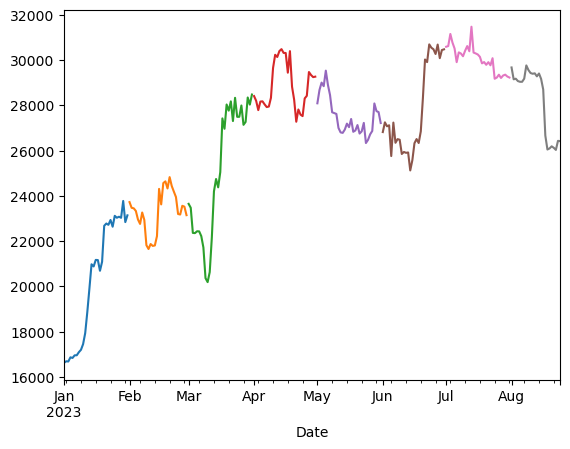

In [17]:
df.loc['2023', 'Close'].resample('M').plot()
plt.show()

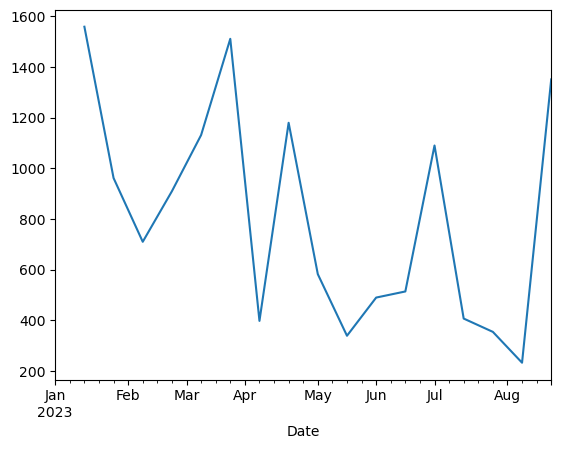

In [19]:
# It's make the mean on each month of 2023
df.loc['2023', 'Close'].resample('2W').std().plot()
plt.show()

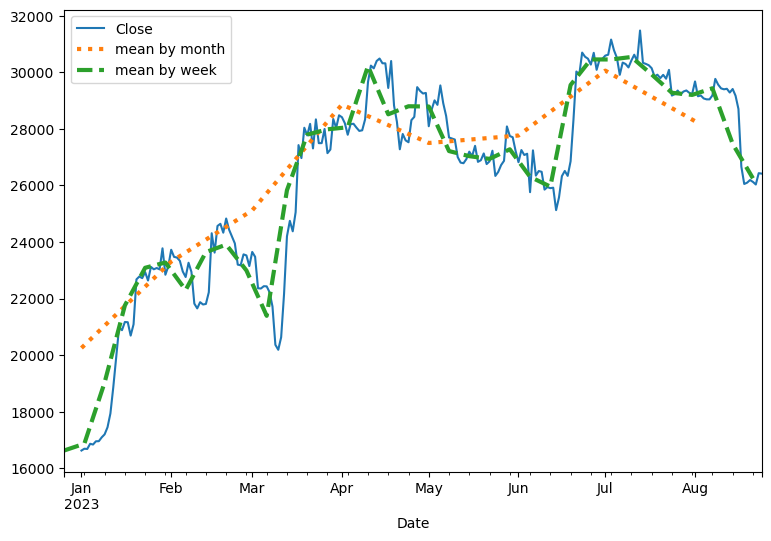

In [31]:
plt.figure(figsize = (9,6))
df.loc['2023','Close'].plot()
df.loc['2023','Close'].resample('M').mean().plot(label = 'mean by month', lw = 3, ls=':')
df.loc['2023','Close'].resample('W').mean().plot(label = 'mean by week', lw = 3, ls= '--')
plt.legend()
plt.show()


# Using of AGGREGATE
It's is use after resample ;it's permit to group some statitic in a dataframe


In [35]:
m = df.loc['2023','Close'].resample('M').agg(['min','max','mean','std'])

In [36]:
m

,min,max,mean,std
Date,,,,
2023-01-31,16625.080078,23774.566406,20250.717490,2657.871506
2023-02-28,21651.183594,24829.148438,23304.539202,942.545877
2023-03-31,20187.244141,28478.484375,25116.900895,2822.886173
2023-04-30,27276.910156,30485.699219,28857.574544,1021.779604
2023-05-31,26334.818359,29534.384766,27499.307145,831.943114
2023-06-30,25124.675781,30695.468750,27763.198438,1967.393632
2023-07-31,29176.916016,31476.048828,30057.469947,597.127768
2023-08-31,26031.656250,29765.492188,28270.115967,1480.174413


<Axes: xlabel='Date'>

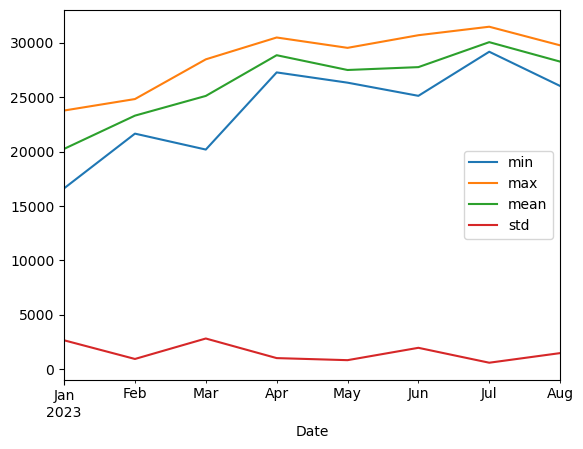

In [37]:
m.plot()

# Moving Average 
Instead of doing the mean on all of our values ... , we do it on window of value 
e.g : we make the mean on 7days and we go on one day and recompute the mean ...

In [38]:
df.loc['2023', 'Close'].rolling(window = 7)

Rolling [window=7,center=False,axis=0,method=single]

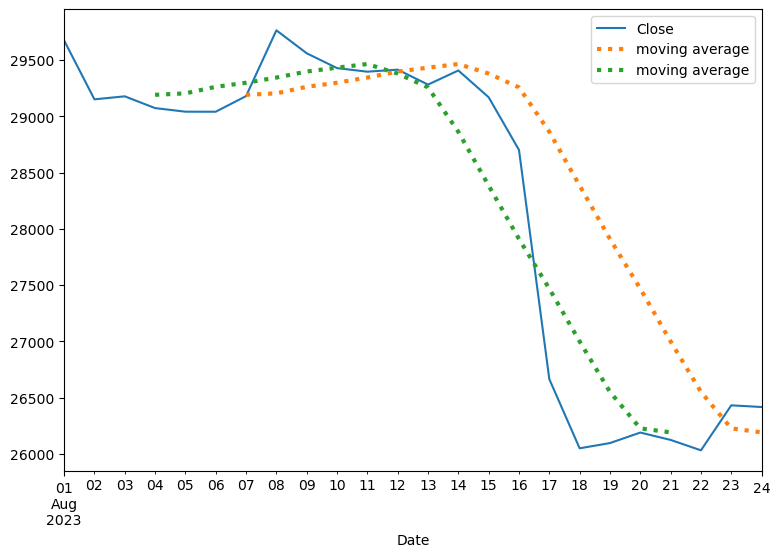

In [50]:
plt.figure(figsize= (9,6))
df.loc['2023-08', 'Close'].plot()
df.loc['2023-08', 'Close'].rolling(window = 7).mean().plot(label = 'moving average' , lw=3 , ls=':')
df.loc['2023-08', 'Close'].rolling(window = 7, center = True).mean().plot(label = 'moving average' , lw=3 , ls=':')
plt.legend()
plt.legend()
plt.show()

# EXP WEIGHTED FUNCTION 



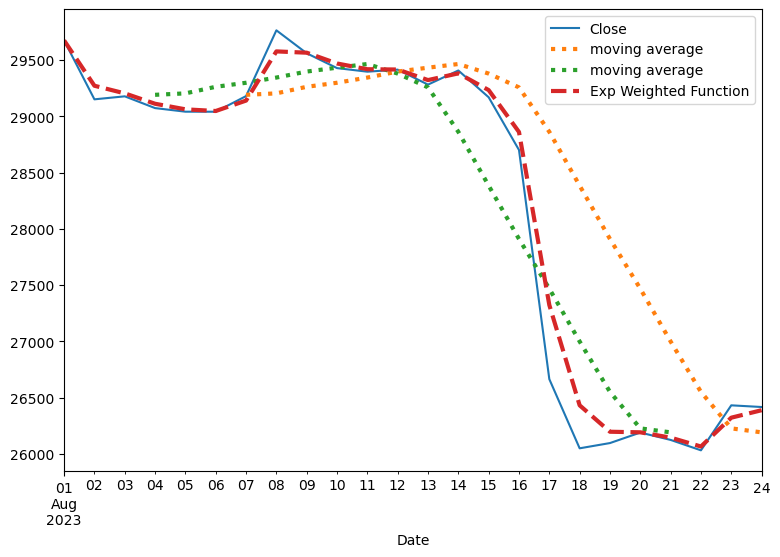

In [59]:
df.loc['2023-08', 'Close'].plot()
df.loc['2023-08', 'Close'].rolling(window = 7).mean().plot(label = 'moving average' , lw=3 , ls=':')
df.loc['2023-08', 'Close'].rolling(window = 7, center = True).mean().plot(label = 'moving average' , lw=3 , ls=':')
df.loc['2023-08', 'Close'].ewm(alpha =0.7).mean().plot(figsize =(9,6),label = 'Exp Weighted Function' , lw=3 , ls='--')
plt.legend()
plt.show()

## ASSEMBLING OF TWO DATASET


In [65]:
# importation of the new dataset -ETH-USD
eth = pd.read_csv('ETH-USD.csv', index_col ='Date',parse_dates = True)

In [66]:
eth.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [71]:
eth.index



DatetimeIndex(['2017-11-09', '2017-11-10', '2017-11-11', '2017-11-12',
               '2017-11-13', '2017-11-14', '2017-11-15', '2017-11-16',
               '2017-11-17', '2017-11-18',
               ...
               '2023-08-19', '2023-08-20', '2023-08-21', '2023-08-22',
               '2023-08-23', '2023-08-24', '2023-08-25', '2023-08-26',
               '2023-08-27', '2023-08-28'],
              dtype='datetime64[ns]', name='Date', length=2119, freq=None)

# Merge or Join
If we want to two series or two dataframe , we can use merge or join method by using inner , outer..<;

<Axes: xlabel='Date'>

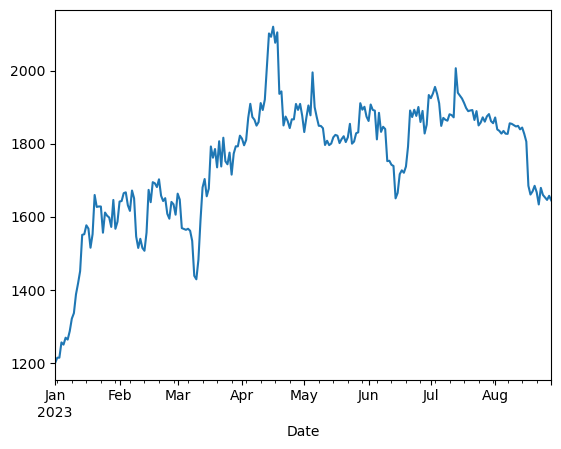

In [75]:
eth.loc['2023', 'Close'].plot()

In [82]:
pd.merge(df,eth ,on='Date',how ='inner').head()

,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
Date,,,,,,,,,,,,
2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [84]:
pd.merge(df,eth ,on='Date',how ='inner',suffixes= ('_btc','_eth')).tail()

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2023-08-20,26096.861328,26260.681641,26004.314453,26189.583984,26189.583984,9036580420,1669.587769,1692.328735,1662.901489,1684.852051,1684.852051,4105056995
2023-08-21,26188.691406,26220.201172,25846.087891,26124.140625,26124.140625,13371557893,1685.022339,1685.082642,1651.959839,1667.269043,1667.269043,5077248383
2023-08-22,26130.748047,26135.507813,25520.728516,26031.656250,26031.656250,14503820706,1667.279297,1668.638672,1596.384033,1633.892578,1633.892578,7244623133
2023-08-23,26040.474609,26786.898438,25804.998047,26431.640625,26431.640625,16985265785,1634.401733,1696.593994,1629.581055,1679.274414,1679.274414,7191868448
2023-08-24,26431.800781,26537.068359,26353.652344,26416.683594,26416.683594,16267772928,1679.248291,1682.489746,1641.627075,1659.944580,1659.944580,5104531920


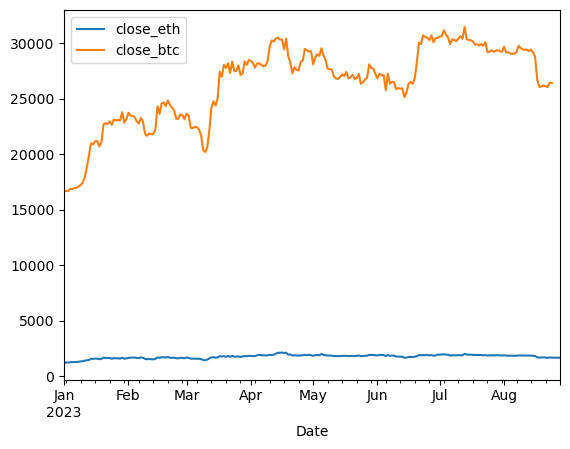

In [88]:
eth.loc['2023', 'Close'].plot(label = 'close_eth')
df.loc['2023', 'Close'].plot(label = 'close_btc')
plt.legend()

In [90]:
new_df = pd.merge(df,eth ,on='Date',how ='inner',suffixes= ('_btc','_eth'))

<Axes: xlabel='Date'>

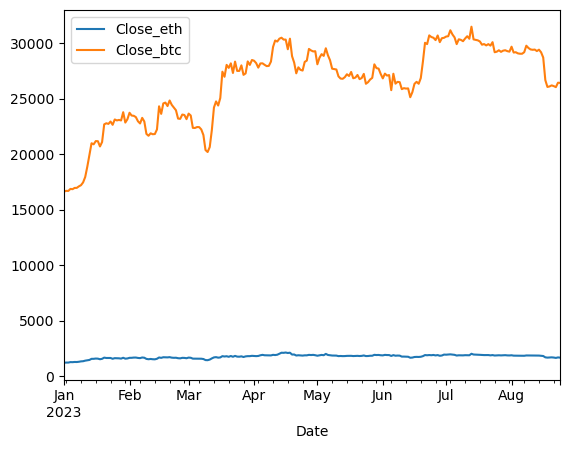

In [94]:
new_df.loc['2023',['Close_eth','Close_btc']].plot()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

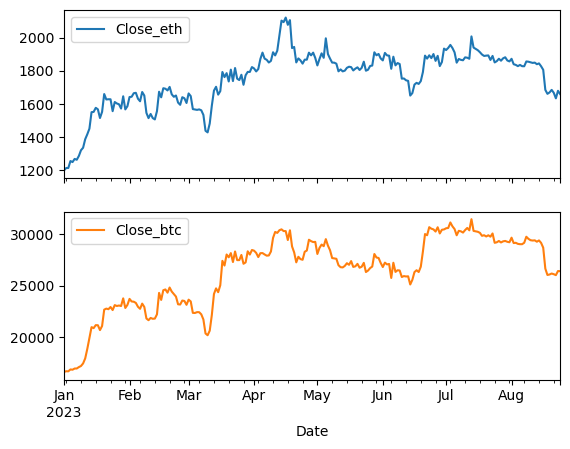

In [95]:
new_df.loc['2023',['Close_eth','Close_btc']].plot(subplots = True)

In [96]:
# Usage de la matrice de correlation afin de voir à quelle le btc et eth se correlle
new_df.loc['2023',['Close_eth','Close_btc']].corr()

,Close_eth,Close_btc
Close_eth,1.000000,0.951496
Close_btc,0.951496,1.000000


Ici la correlation est de 95% , proche de  100% . Ceux qui signifie que lorsque le btc augmente, 
l'eth augmente également ou , si le btc diminue, l'eth diminue aussi .
Soit la corr était proche de -1 , alors dans cet cas , si le btc augmente, l'seth diminue.

NB : La correlation de fonctionne que sur les fonctions linéaires